In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("reduced_dataset.csv")

# Convert 'num' to binary: 0 = no disease, 1 = disease
df['target'] = (df['num'] > 0).astype(int)

# Drop original multiclass 'num'
df = df.drop(columns=['num'])

X = df.drop(columns=['target'])
y = df['target']

print("Target value counts:")
print(y.value_counts())

Target value counts:
target
0    164
1    139
Name: count, dtype: int64


In [9]:
# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Train Models

In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
}

fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f"{name} trained successfully!")

Logistic Regression trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
SVM trained successfully!


In [13]:
# Evaluate Models (Metrics)

In [14]:
results = []

for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"

    results.append([name, acc, prec, rec, f1, auc])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "AUC"])
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score       AUC
0  Logistic Regression  0.885246   0.818182  0.964286  0.885246  0.971861
1        Decision Tree  0.803279   0.722222  0.928571  0.812500  0.812771
2        Random Forest  0.918033   0.870968  0.964286  0.915254  0.949675
3                  SVM  0.934426   0.900000  0.964286  0.931034  0.967532


In [ ]:
# ROC curves

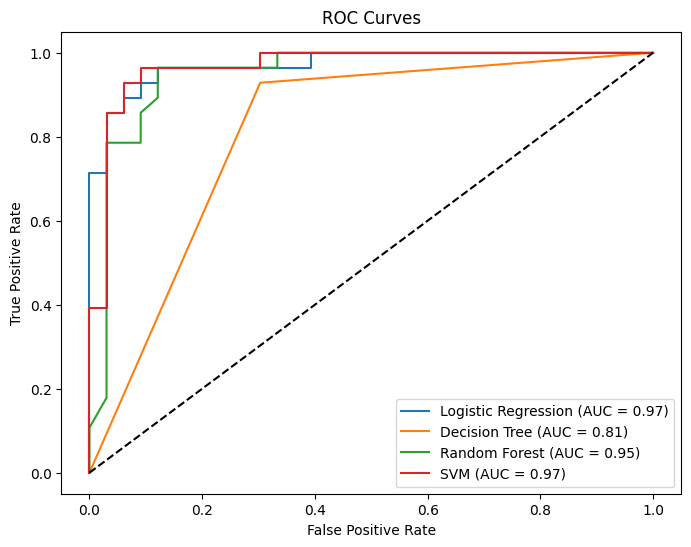

In [15]:
plt.figure(figsize=(8,6))

for name, model in fitted_models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()